# Simple Directed Graphical Models in TF Probability

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML, TFP, TF]

### Basic Imports

In [1]:
#import silence_tensorflow.auto

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import functools
import seaborn as sns
import tensorflow_probability as tfp
import pandas as pd

tfd = tfp.distributions
tfl = tfp.layers
tfb = tfp.bijectors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import pygraphviz as pgv

A = pgv.AGraph(directed=True)
A.node_attr["style"] = "filled"
A.add_edge("Rain", "Sprinkler", minlen=1, arrowsize=1, directed=True)
A.layout("dot")
A.graph_attr.update(size="4,4!")
A.draw("dgm.png")

![](dgm.png)

In [3]:
import tensorflow as tf
tf.Variable(2.)

Metal device set to: Apple M1


2022-02-06 14:56:37.170460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 14:56:37.170549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [4]:
def grass_wet_model(rain_prob, rain_to_sprinkler_probs):
    rain = yield tfp.distributions.JointDistributionCoroutine.Root(
        tfp.distributions.Bernoulli(probs=rain_prob, name="Rain")
    )

    sprinkler = yield tfp.distributions.Bernoulli(
        probs=rain_to_sprinkler_probs[rain], name="Sprinkler"
    )

In [5]:
theta_rain = tf.constant(0.2)
theta_sprinkler = tf.constant([0.8, 0.3])

In [6]:
model_joint_original = tfp.distributions.JointDistributionCoroutineAutoBatched(
    lambda: grass_wet_model(theta_rain, theta_sprinkler), name="Original"
)

In [7]:
model_joint_original

<tfp.distributions.JointDistributionCoroutineAutoBatched 'Original' batch_shape=[] event_shape=StructTuple(
  Rain=[],
  Sprinkler=[]
) dtype=StructTuple(
  Rain=int32,
  Sprinkler=int32
)>

In [ ]:
model_joint_original.sample(10)

In [4]:
dataset = model_joint_original.sample(500)

NameError: name 'model_joint_original' is not defined

In [74]:
dataset

StructTuple(
  Rain=<tf.Tensor: shape=(500,), dtype=int32, numpy=
    array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
           0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
           1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
           0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
           0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
           0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          

In [56]:
dataset.Sprinkler

<tf.Tensor: shape=(500,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
     

In [171]:
theta_hat_rain = tfp.util.TransformedVariable(
    0.5, bijector=tfp.bijectors.SoftClip(0.0, 1.0), name="theta_hat_rain"
)

theta_hat_sprinkler = tfp.util.TransformedVariable(
    [0.6, 0.4], bijector=tfp.bijectors.SoftClip(0.0, 1.0), name="theta_hat_sprinkler"
)

In [172]:
model_fit = tfp.distributions.JointDistributionCoroutineAutoBatched(
    lambda: grass_wet_model(theta_hat_rain, theta_hat_sprinkler), name="Fit"
)

print(model_fit)
model_fit.trainable_variables

tfp.distributions.JointDistributionCoroutineAutoBatched("Fit", batch_shape=[], event_shape=StructTuple(
  Rain=[],
  Sprinkler=[]
), dtype=StructTuple(
  Rain=int32,
  Sprinkler=int32
))


(<tf.Variable 'theta_hat_rain:0' shape=() dtype=float32, numpy=0.65663093>,)

In [173]:
neg_ll = lambda: -tf.reduce_mean(model_fit.log_prob(dataset))

In [174]:
trace_fn = lambda traceable_quantities: {
    "loss": traceable_quantities.loss,
    "theta_hat_rain": theta_hat_rain,
    "theta_hat_sprinkler": theta_hat_sprinkler,
}

In [175]:
trace = tfp.math.minimize(
    loss_fn=neg_ll,
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    num_steps=100,
    trace_fn=trace_fn,
)

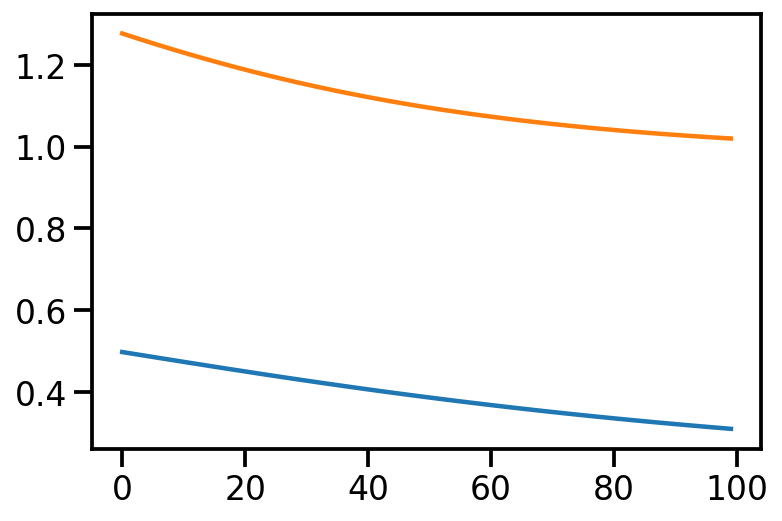

In [177]:
plt.plot(trace["theta_hat_rain"])
plt.plot(trace["loss"])

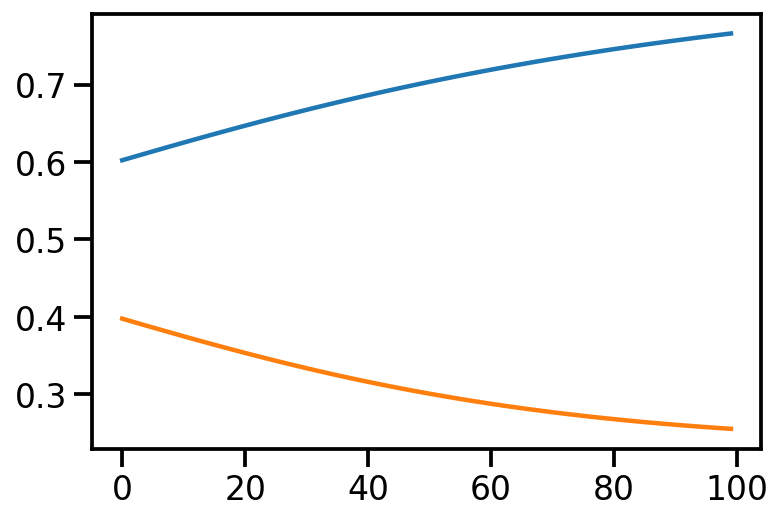

In [179]:
plt.plot(trace["theta_hat_sprinkler"])

References

- https://www.tensorflow.org/probability/examples/Probabilistic_PCA
- https://www.youtube.com/watch?v=l2f6Ic6SeqE&list=PLISXH-iEM4JlFsAp7trKCWyxeO3M70QyJ&index=4
- https://jeffpollock9.github.io/almost-always-auto-batched/
- https://jeffpollock9.github.io/bayesian-workflow-with-tfp-and-arviz/